In [75]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [76]:
pd.read_csv('adult.csv')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [77]:
data = pd.read_csv("adult.csv",na_values='?',skipinitialspace=True)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [78]:
data.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [79]:
data=data.dropna()

In [80]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [81]:
data.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [82]:
data['income']=data['income'].map({'<=50K': 0, '>50K': 1})
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [85]:
## Exploratory data analysis

In [86]:
data.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.075792,0.037623,0.079683,0.059351,0.101992,0.237040
fnlwgt,-0.075792,1.000000,-0.041993,-0.004110,-0.004349,-0.018679,-0.007264
educational-num,0.037623,-0.041993,1.000000,0.126907,0.081711,0.146206,0.332800
capital-gain,0.079683,-0.004110,0.126907,1.000000,-0.032102,0.083880,0.221034
capital-loss,0.059351,-0.004349,0.081711,-0.032102,1.000000,0.054195,0.148687
hours-per-week,0.101992,-0.018679,0.146206,0.083880,0.054195,1.000000,0.227199
income,0.237040,-0.007264,0.332800,0.221034,0.148687,0.227199,1.000000


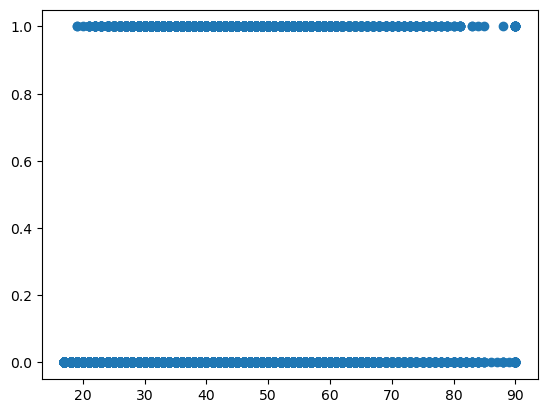

In [89]:
plt.scatter(data['age'],data['income'])
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassfier
from sklearn.feature_selection import SelectFromModel

In [83]:
print('\nunique values in workclass:-',data['workclass'].nunique())
print(data['workclass'].unique())

print('\nunique values in occupation:-',data['occupation'].nunique())
print(data['occupation'].unique())

print('\nunique values in race:-',data['race'].nunique())
print(data['race'].unique())

print('\nunique values in race:-',data['marital-status'].nunique())
print(data['marital-status'].unique())

print('\nunique values in gender:-',data['gender'].nunique())
print(data['gender'].unique())

print('\nunique values in relationship:-',data['relationship'].nunique())
print(data['relationship'].unique())




unique values in workclass:- 7
['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']

unique values in occupation:- 14
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']

unique values in race:- 5
['Black' 'White' 'Other' 'Amer-Indian-Eskimo' 'Asian-Pac-Islander']

unique values in race:- 7
['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']

unique values in gender:- 2
['Male' 'Female']

unique values in relationship:- 6
['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']


In [74]:
data['workclass']=data['workclass'].map({ 'Self-emp-not-inc':0, 'Self-emp-inc':1,'Private':2, 'Local-gov':3, 'Federal-gov':4, 'State-gov':5,
 'Without-pay':6})

In [11]:
data['occupation']=data['occupation'].map({'Machine-op-inspct':1, 'Farming-fishing':2, 'Protective-serv':3,
 'Prof-specialty':4, 'Craft-repair':5, 'Adm-clerical':6, 'Exec-managerial':7,
 'Tech-support':8, 'Sales' :9,'Priv-house-serv':10, 'Transport-moving':11,
 'Handlers-cleaners':12, 'Armed-Forces':13,'Other-service':14})

In [12]:
data['race']=data['race'].map({'Black':0, 'White':1, 'Other':5, 'Amer-Indian-Eskimo':3, 'Asian-Pac-Islander':4})

In [13]:
data['marital-status']=data['marital-status'].replace(['Never-married' ,'Widowed','Separated','Divorced'],'single')
data['marital-status']=data['marital-status'].replace(['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse'],'married')

In [14]:
data['marital-status']=data['marital-status'].map({'single':0,'married':1})

In [15]:
data['relationship']=data['relationship'].map({'Own-child':1, 'Husband': 3,'Not-in-family':0, 'Unmarried':2, 'Wife':4, 'Other-relative':5})

In [16]:
data['gender']=data['gender'].map({'Male':0,'Female':1})

In [17]:
data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

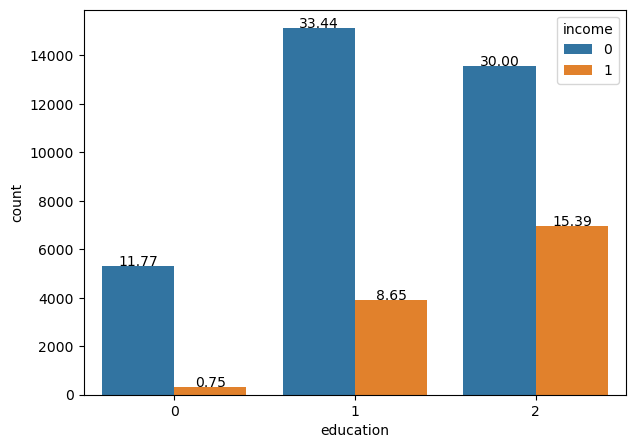

In [64]:
plt.figure(figsize=(7,5))
total = float(len(data) )
ax = sns.countplot(x="education", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
 height + 3,
 '{:1.2f}'.format((height/total)*100),
 ha="center") 
plt.show()


In [18]:
data['education']=data['education'].replace(['Preschool','1st-4th','5th-6th','7th-8th','9th', '10th','11th', '12th'],'schooling')
data['education']=data['education'].replace(['HS-grad','Prof-school','Assoc-acdm','Assoc-voc','Prof-school'],'prof_school')
data['education']=data['education'].replace([ 'Bachelors','Some-college','Doctorate','Masters'],'graduation')
data['education']=data['education'].map({'schooling':0,'prof_school':1,'graduation':2})

In [19]:
data['education'].unique()

array([0, 1, 2], dtype=int64)

In [20]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,0,7,0,1,1,0,0,0,0,40,United-States,0
1,38,2,89814,1,9,1,2,3,1,0,0,0,50,United-States,0
2,28,3,336951,1,12,1,3,3,1,0,0,0,40,United-States,1
3,44,2,160323,2,10,1,1,3,0,0,7688,0,40,United-States,1
5,34,2,198693,0,6,0,14,0,1,0,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,1,12,1,8,4,1,1,0,0,38,United-States,0
48838,40,2,154374,1,9,1,1,3,1,0,0,0,40,United-States,1
48839,58,2,151910,1,9,0,6,2,1,1,0,0,40,United-States,0
48840,22,2,201490,1,9,0,6,1,1,0,0,0,20,United-States,0


In [21]:
data.drop(['native-country','educational-num'],axis=1)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,2,226802,0,0,1,1,0,0,0,0,40,0
1,38,2,89814,1,1,2,3,1,0,0,0,50,0
2,28,3,336951,1,1,3,3,1,0,0,0,40,1
3,44,2,160323,2,1,1,3,0,0,7688,0,40,1
5,34,2,198693,0,0,14,0,1,0,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,1,1,8,4,1,1,0,0,38,0
48838,40,2,154374,1,1,1,3,1,0,0,0,40,1
48839,58,2,151910,1,0,6,2,1,1,0,0,40,0
48840,22,2,201490,1,0,6,1,1,0,0,0,20,0


In [60]:
##Understand the data better

In [61]:
data.corr()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.062012,-0.075792,-0.010340,0.308812,-0.096623,0.205421,-0.018477,-0.082053,0.079683,0.059351,0.101992,0.237040
workclass,-0.062012,1.000000,0.014327,0.093384,-0.084333,-0.019297,-0.059337,-0.013926,0.103814,-0.046588,-0.012361,-0.092463,-0.004839
fnlwgt,-0.075792,0.014327,1.000000,-0.029566,-0.024593,0.008169,-0.011722,-0.102169,-0.027240,-0.004110,-0.004349,-0.018679,-0.007264
education,-0.010340,0.093384,-0.029566,1.000000,0.020480,-0.102112,-0.036505,0.028875,0.029530,0.045884,0.049151,0.087977,0.219213
marital-status,0.308812,-0.084333,-0.024593,0.020480,1.000000,-0.142755,0.751041,0.053621,-0.427556,0.077847,0.074532,0.222263,0.437678
occupation,-0.096623,-0.019297,0.008169,-0.102112,-0.142755,1.000000,-0.076834,-0.024910,0.106318,-0.038111,-0.029091,-0.145736,-0.125908
relationship,0.205421,-0.059337,-0.011722,-0.036505,0.751041,-0.076834,1.000000,0.038984,-0.222086,0.049267,0.046339,0.112807,0.319087
race,-0.018477,-0.013926,-0.102169,0.028875,0.053621,-0.024910,0.038984,1.000000,-0.038045,0.011822,0.004490,0.011383,0.026601
gender,-0.082053,0.103814,-0.027240,0.029530,-0.427556,0.106318,-0.222086,-0.038045,1.000000,-0.047444,-0.046457,-0.231425,-0.215760
capital-gain,0.079683,-0.046588,-0.004110,0.045884,0.077847,-0.038111,0.049267,0.011822,-0.047444,1.000000,-0.032102,0.083880,0.221034


In [22]:
x=data.iloc[:,0:12]
y=data.iloc[:,-1]

In [23]:
x

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss
0,25,2,226802,0,7,0,1,1,0,0,0,0
1,38,2,89814,1,9,1,2,3,1,0,0,0
2,28,3,336951,1,12,1,3,3,1,0,0,0
3,44,2,160323,2,10,1,1,3,0,0,7688,0
5,34,2,198693,0,6,0,14,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,1,12,1,8,4,1,1,0,0
48838,40,2,154374,1,9,1,1,3,1,0,0,0
48839,58,2,151910,1,9,0,6,2,1,1,0,0
48840,22,2,201490,1,9,0,6,1,1,0,0,0


In [24]:
y

0        0
1        0
2        1
3        1
5        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 45222, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold, learning_curve, train_test_split, KFold

In [26]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8, random_state=0)

In [27]:
log=LogisticRegression()

In [28]:
log.fit(x_train,y_train)

LogisticRegression()

In [29]:
pred=log.predict(x_test)

In [30]:
print(pred)

[0 0 0 ... 0 0 0]


In [31]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(pred,y_test)
accuracy

0.7828634604754008

In [32]:
y_test.shape

(9045,)

In [33]:
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(pred,y_test)
print(conf_matrix)

[[6518 1709]
 [ 255  563]]


In [34]:
from sklearn.metrics import classification_report
report=classification_report(pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      8227
           1       0.25      0.69      0.36       818

    accuracy                           0.78      9045
   macro avg       0.61      0.74      0.62      9045
weighted avg       0.90      0.78      0.82      9045



---------------------------------------------------completed--------------------------------------------------------------------------------------------

In [35]:
#Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [36]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [37]:
data=data.drop(['native-country','educational-num'],axis=1)

In [38]:
data.shape

(45222, 13)

In [42]:
x = data.iloc[:,0:12]
y = data['income']
print('Split Data: X')
print(x)
print('Split Data: Y')
print(y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
x_train, x_validation, y_train, y_validation = train_test_split(x,y, 
test_size=validation_size)

Split Data: X
       age  workclass  fnlwgt  education  marital-status  occupation  \
0       25          2  226802          0               0           1   
1       38          2   89814          1               1           2   
2       28          3  336951          1               1           3   
3       44          2  160323          2               1           1   
5       34          2  198693          0               0          14   
...    ...        ...     ...        ...             ...         ...   
48837   27          2  257302          1               1           8   
48838   40          2  154374          1               1           1   
48839   58          2  151910          1               0           6   
48840   22          2  201490          1               0           6   
48841   52          1  287927          1               1           7   

       relationship  race  gender  capital-gain  capital-loss  hours-per-week  
0                 1     0       0        

In [55]:
# Params for Random Forest
num_trees = 250
max_features = 5


In [56]:
#Spot Check 4 Algorithms (LR, KNN, CART, GNB, RFC)
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, 
max_features=max_features, random_state=seed)))

In [57]:
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, 
                                 scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.786605 (0.007562)
KNN: 0.769163 (0.006721)
CART: 0.803743 (0.006825)
NB: 0.785250 (0.008054)
RF: 0.848578 (0.006015)


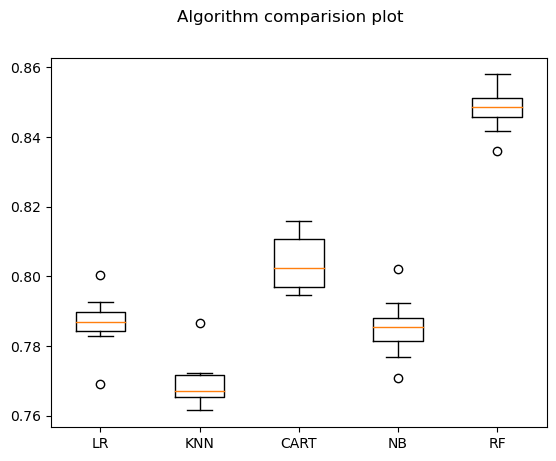

In [50]:
fig=plt.figure()
fig.suptitle('Algorithm comparision plot')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [59]:
#Finalize Model
random_forest =RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_validation)
print("Accuracy: %s%%" % (100*accuracy_score(y_validation, 
predictions)))
print('\n confusion_matrix-:\n',confusion_matrix(y_validation, predictions))
print('\n Report  -:\n',classification_report(y_validation, predictions))


Accuracy: 85.43946932006634%

 confusion_matrix-:
 [[6331  528]
 [ 789 1397]]

 Report  -:
               precision    recall  f1-score   support

           0       0.89      0.92      0.91      6859
           1       0.73      0.64      0.68      2186

    accuracy                           0.85      9045
   macro avg       0.81      0.78      0.79      9045
weighted avg       0.85      0.85      0.85      9045



In [92]:
y_validation

830      0
33507    1
21367    0
32191    0
15370    1
        ..
48198    0
15055    0
33337    0
30264    1
9528     0
Name: income, Length: 9045, dtype: int64

In [93]:
predictions

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [94]:
#improve the model

In [99]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
#from sklearn.feature_selection import SelectFromModel

In [162]:
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.2, random_state=1)

print(x_train.shape)
print(y_train.shape)

(9044, 12)
(9044,)


In [164]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 500))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=500))

In [165]:
sel.get_support()

array([ True, False,  True, False,  True,  True,  True, False, False,
        True, False,  True])

In [166]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

7

In [167]:
selected_feat

Index(['age', 'fnlwgt', 'marital-status', 'occupation', 'relationship',
       'capital-gain', 'hours-per-week'],
      dtype='object')

In [170]:
#Finalize Model
random_forest =RandomForestClassifier(n_estimators=500,max_features=3)
random_forest.fit(x_train[selected_feat], y_train)
predictions = random_forest.predict(x_validation[selected_feat])
print("Accuracy: %s%%" % (100*accuracy_score(y_validation, predictions)))
print('\n confusion_matrix-:\n',confusion_matrix(y_validation, predictions))
print('\n Report  -:\n',classification_report(y_validation, predictions))
scores = cross_val_score(random_forest, x_train[selected_feat], y_train, cv=5)
print('\n Cross validation score  -:\n',scores.mean())

Accuracy: 86.67772249861802%

 confusion_matrix-:
 [[6356  503]
 [ 702 1484]]

 Report  -:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      6859
           1       0.75      0.68      0.71      2186

    accuracy                           0.87      9045
   macro avg       0.82      0.80      0.81      9045
weighted avg       0.86      0.87      0.86      9045


 Cross validation score  -:
 0.8265153460817839


In [120]:
#find which variable gives highest accuracy

#fnlwgt - 85%
#capital-gain - 81%
#['fnlwgt','capital-gain','occupation'] - 93%
